# Metrics

- cross-validation
    - `from sklearn.model_selection import cross_val_score`
        - more control over `cross_val_score` with `KFold() or LeaveOneOut() or ShuffleSplit()`

### Grid Search
- hyperparameter tuning

#### Example: Combination of `C` and `gamma` parameter in SVC - finding the best one

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), params, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print(grid_search.score(X_test, y_test))
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.9736842105263158
{'C': 1, 'gamma': 0.1}
0.9732142857142857
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000800,0.001600,0.0000,0.000000,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.333333,0.347826,0.363636,...,0.348214,0.013507,22,0.352273,0.348315,0.344444,0.344444,0.351648,0.348225,0.003367
1,0.001600,0.001959,0.0000,0.000000,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.333333,0.347826,0.363636,...,0.348214,0.013507,22,0.352273,0.348315,0.344444,0.344444,0.351648,0.348225,0.003367
2,0.000800,0.001600,0.0016,0.001960,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.333333,0.347826,0.363636,...,0.348214,0.013507,22,0.352273,0.348315,0.344444,0.344444,0.351648,0.348225,0.003367
3,0.000801,0.001602,0.0016,0.001959,0.001,1,"{'C': 0.001, 'gamma': 1}",0.333333,0.347826,0.363636,...,0.348214,0.013507,22,0.352273,0.348315,0.344444,0.344444,0.351648,0.348225,0.003367
4,0.000000,0.000000,0.0000,0.000000,0.001,10,"{'C': 0.001, 'gamma': 10}",0.333333,0.347826,0.363636,...,0.348214,0.013507,22,0.352273,0.348315,0.344444,0.344444,0.351648,0.348225,0.003367


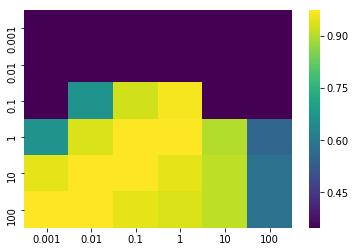

In [19]:
sns.heatmap(np.array(results.mean_test_score).reshape(6,6), cmap="viridis", xticklabels=params['gamma'], yticklabels=params['C'])

In [20]:
params = [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

grid_search = GridSearchCV(SVC(), params, cv=5, return_train_score=True)
grid_search.fit(X_train, y_train)
print(grid_search.score(X_test, y_test))
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.9736842105263158
{'C': 1, 'kernel': 'rbf'}
0.9821428571428571
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

GridSearch in combination with SVC

- 36\*5\*5 = 900 models are being built

In [21]:
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.model_selection import cross_val_score
scores = cross_val_score(GridSearchCV(SVC(), params, cv=5),
iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean cross-validation score:  0.9800000000000001


## Metrics
- keep the end goal in mind - business metric - predictions are used as part of a larger decision making proces
    - consequence: pick a model parameter that have the most positive influence on the business metrics
- **accuracy** is often not a good measure of predictive performance, it doesn't contain all the information we're interested in 
    - e.g. cancer detection: **false positive (type I error)** leads to additional test, **false negative (type II error)** may lead to death
    

### Binary classification
Datasets are often not balanced, class imbalances need to be consider too
- e.g. 90% accuracy might be just a model predicting one class

Use:
- confusion matrix: `from sklearn.metrics import confusion_matrix(y_test, preds)`
- **precision** = PPV - how many predicted positives are actually positive. Goal: Limit the number of false negatives
- **recall** = TPR - how many positive samples are captured by the positive predictions. Goal: Identify all positive samples

There is tradeoff in optimizing for precision and for recall. You can easily obtain 100\% recall if predicting all the samples as positive, but the number of false-positives will be too high, so precision will be low.

- **f-score** - a way to summarize both precision and recall.
    - better predictive measure than accuracy on imbalanced classification datasets
    - `from sklearn.metrics import f1_score`
    
- `sklearn.metrics import classification_report` - for summary of precision, recall and f-score


#### Uncertainty
Calibration: a calibrated model is a model that provides an accurate
measure of its uncertainty.

## Roc curves
Adjusting the threshold at which we make the prediction is a way of regulating the trade-off between precision and recall. It is oftentimes not clear what \% of recall vs. precision we want, that's why it's useful to visualize this relationship using a ROC curve.

ROC curves are therefore a useful measure when the classes are imbalanced

In [40]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X, y = make_blobs(n_samples=4000, centers=2, cluster_std=[7.0, 2],random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y)
svc = SVC().fit(X_train, y_train)
from sklearn.metrics import average_precision_score
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of svc: {:.3f}".format(ap_svc))

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Average precision of svc: 0.875


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(0.0, 1.0)

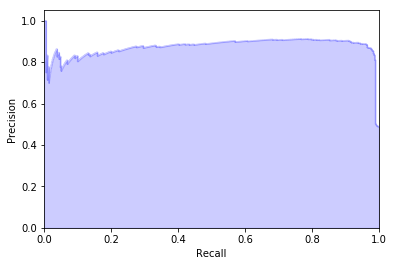

In [41]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
y_score = svc.decision_function(X_test)
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
prec, recall, thresholds = precision_recall_curve(y_test, y_score)
plt.step(recall, prec, color='b', alpha=0.2, where='post')
plt.fill_between(recall, prec, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

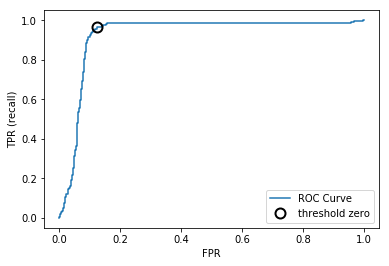

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

gamma = 1.00 accuracy = 0.92 AUC = 0.93
gamma = 0.05 accuracy = 0.91 AUC = 0.95
gamma = 0.01 accuracy = 0.92 AUC = 0.96


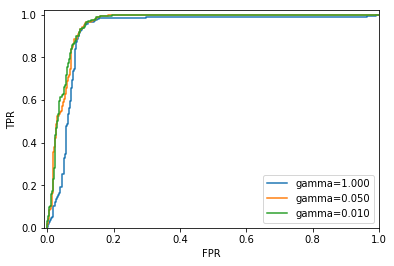

In [45]:
for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(
    gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

### Let's try the same thing with confusion matrix to add more information about the prediction

In [48]:
from sklearn.metrics import confusion_matrix
print(f"Confusion matrix [Dummy]: \n{confusion_matrix(y_test, dummy_majority_pred)}")
print(f"Confusion matrix [DecTree]: \n{confusion_matrix(y_test, dec_tree_pred)}")
print(f"Confusion matrix [LR]: \n{confusion_matrix(y_test, lr_pred)}")

Confusion matrix [Dummy]: 
[[408   0]
 [ 42   0]]
Confusion matrix [DecTree]: 
[[398  10]
 [ 10  32]]
Confusion matrix [LR]: 
[[400   8]
 [  4  38]]


In [49]:
from sklearn.metrics import f1_score
print(f"f1_score [Dummy]: \n{f1_score(y_test, dummy_majority_pred)}")
print(f"f1_score [DecTree]: \n{f1_score(y_test, dec_tree_pred)}")
print(f"f1_score [LR]: \n{f1_score(y_test, lr_pred)}")

f1_score [Dummy]: 
0.0
f1_score [DecTree]: 
0.7619047619047619
f1_score [LR]: 
0.8636363636363636


C:\Users\terez\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [50]:
from sklearn.metrics import classification_report
print(f"classification_report [Dummy]: \n{classification_report(y_test, dummy_majority_pred)}")
print(f"classification_report [DecTree]: \n{classification_report(y_test, dec_tree_pred)}")
print(f"classification_report [LR]: \n{classification_report(y_test, lr_pred)}")

classification_report [Dummy]: 
              precision    recall  f1-score   support

       False       0.91      1.00      0.95       408
        True       0.00      0.00      0.00        42

   micro avg       0.91      0.91      0.91       450
   macro avg       0.45      0.50      0.48       450
weighted avg       0.82      0.91      0.86       450

classification_report [DecTree]: 
              precision    recall  f1-score   support

       False       0.98      0.98      0.98       408
        True       0.76      0.76      0.76        42

   micro avg       0.96      0.96      0.96       450
   macro avg       0.87      0.87      0.87       450
weighted avg       0.96      0.96      0.96       450

classification_report [LR]: 
              precision    recall  f1-score   support

       False       0.99      0.98      0.99       408
        True       0.83      0.90      0.86        42

   micro avg       0.97      0.97      0.97       450
   macro avg       0.91      0.94

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\terez\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [4]:
len(list(adult_dummies.columns))

46

In [5]:
X = adult_dummies.drop(['income_<=50K', 'income_>50K'], axis=1).values
y = adult_dummies['income_>50K'].values
X.shape

(48842, 44)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)
log = LogisticRegression()
log.fit(X_train, y_train)
print(f"Test score: {log.score(X_test, y_test)}")

C:\Users\terez\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Test score: 0.8156580132667267


In [7]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
plt.plot(X[:, 0], y, 'o')

### Making linear models more powerful on continuous data - binning, disretization, adding polynomials
- skipped

### Scaling using `log`, `exp`
Linear models and neural networks are tied to scale and distribution of the features. `log` and `exp` can help in relatively scaling the data better.

In [8]:
rnd = np.random.RandomState()
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

Plot the distribution of the data

<BarContainer object of 351 artists>

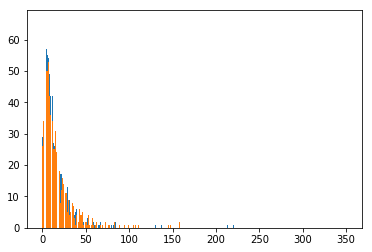

In [9]:
bins = np.bincount(X[:, 0])
bins2 = np.bincount(X[:, 1])
plt.bar(range(len(bins)), bins)
plt.bar(range(len(bins2)), bins2)

In [10]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.600


Not great, let's try logarithmic transformation

([array([24.,  0., 27.,  0., 42., 40., 42., 43., 82., 64., 96., 61., 61.,
         47., 42., 32., 15., 14.,  8.,  5.,  1.,  2.,  0.,  1.,  1.]),
  array([20.,  0., 22.,  0., 46., 55., 36., 40., 78., 58., 85., 57., 77.,
         38., 46., 33., 23., 14.,  8.,  7.,  2.,  4.,  0.,  0.,  1.]),
  array([16.,  0., 29.,  0., 37., 41., 47., 53., 75., 60., 70., 58., 89.,
         45., 33., 34., 25., 15., 12.,  2.,  3.,  5.,  1.,  0.,  0.])],
 array([0.        , 0.23443145, 0.4688629 , 0.70329435, 0.9377258 ,
        1.17215724, 1.40658869, 1.64102014, 1.87545159, 2.10988304,
        2.34431449, 2.57874594, 2.81317739, 3.04760884, 3.28204029,
        3.51647173, 3.75090318, 3.98533463, 4.21976608, 4.45419753,
        4.68862898, 4.92306043, 5.15749188, 5.39192333, 5.62635477,
        5.86078622]),
 <a list of 3 Lists of Patches objects>)

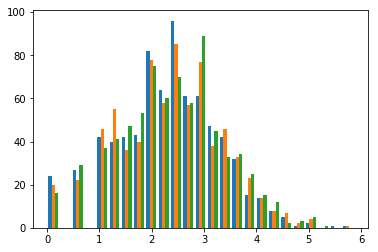

In [11]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)
plt.hist(X_train_log, bins=25)

In [12]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.873


## Feature selection
3 basic strategies how to select the most important features:
- univariate statistics (ANOVA)
- model-based selection
- iterative selection (RecursiveFeatureElimination in sklearn)

X_train.shape: (426, 30)
X_train_selected.shape: (426, 15)


Text(0.5, 0, 'Selected features')

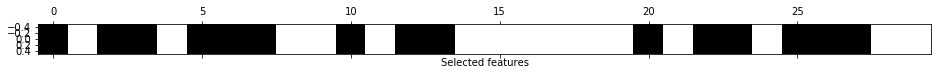

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Selected features")

Text(0.5, 0, 'Sample index')

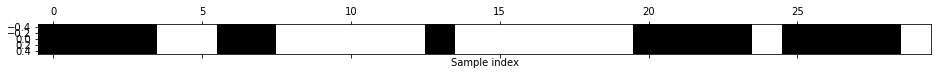

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100), n_features_to_select=15)

select.fit(X_train, y_train)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

### Domain knowledge

C:\Users\terez\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Rentals')

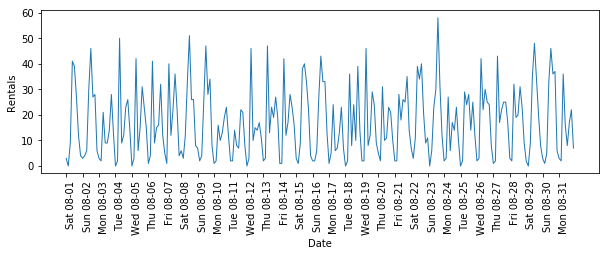

In [15]:
bike = mglearn.datasets.load_citibike()
df = pd.DataFrame(bike)
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=bike.index.min(), end=bike.index.max(),
freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(bike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

In [16]:
y = bike.values
X = bike.index.astype("int64").values.reshape(-1,1)
X

array([[1438387200000000000],
       [1438398000000000000],
       [1438408800000000000],
       [1438419600000000000],
       [1438430400000000000],
       [1438441200000000000],
       [1438452000000000000],
       [1438462800000000000],
       [1438473600000000000],
       [1438484400000000000],
       [1438495200000000000],
       [1438506000000000000],
       [1438516800000000000],
       [1438527600000000000],
       [1438538400000000000],
       [1438549200000000000],
       [1438560000000000000],
       [1438570800000000000],
       [1438581600000000000],
       [1438592400000000000],
       [1438603200000000000],
       [1438614000000000000],
       [1438624800000000000],
       [1438635600000000000],
       [1438646400000000000],
       [1438657200000000000],
       [1438668000000000000],
       [1438678800000000000],
       [1438689600000000000],
       [1438700400000000000],
       [1438711200000000000],
       [1438722000000000000],
       [1438732800000000000],
       [14

The separation boundary could be fitted quite well even with a simple classifier now. Let's explore the components.

(100, 5655)
[[-0.00428032 -0.00468023 -0.00509046 ... -0.00443612 -0.00372605
  -0.00286393]
 [ 0.01235992  0.01206183  0.01200164 ... -0.02372458 -0.02273985
  -0.02146325]
 [ 0.0301804   0.03058382  0.03133349 ...  0.01755199  0.01610381
   0.01481116]
 ...
 [-0.04127406 -0.03795531 -0.03138693 ... -0.02150855 -0.03901761
  -0.0496391 ]
 [-0.0011442   0.00180604  0.00534935 ...  0.02542932  0.04404785
   0.0505446 ]
 [ 0.00813842  0.0043678  -0.00113236 ... -0.03012424 -0.02852555
  -0.01944515]]


Text(0, 0.5, 'Principal components')

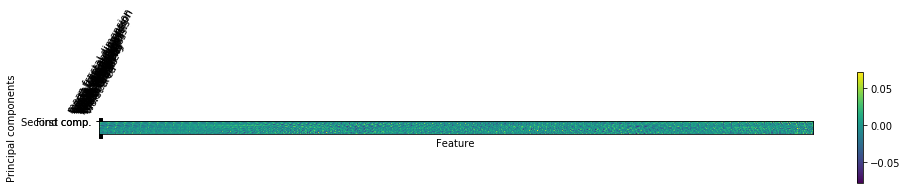

In [25]:
print(pca.components_.shape)
print(pca.components_)

plt.matshow(pca.components_)
plt.yticks([0,1], ["First comp.", "Second comp."])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60)
plt.xlabel("Feature")
plt.ylabel("Principal components")

Feature extraction with images

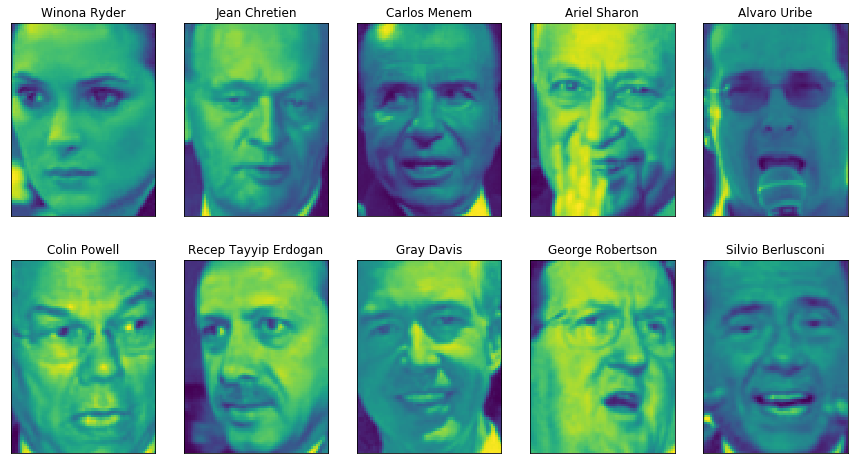

In [26]:
from sklearn.datasets import fetch_lfw_people
people_dataset = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
fix, axes = plt.subplots(2,5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks':()})
for target, image, ax in zip(people_dataset.target, people_dataset.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people_dataset.target_names[target])

In [27]:
people_dataset.images.shape

(3023, 87, 65)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(people_dataset.data, people_dataset.target, stratify=people_dataset.target)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.32142857142857145


Not bad for 61 classes, but not ideal, let's try PCA

In [29]:
# whitening rescales the principal components to have the same scale.
pca = PCA(n_components=100, whiten=True).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train.shape)
print(X_train_pca.shape)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print(knn.score(X_test_pca, y_test))

(2267, 5655)
(2267, 100)
0.4351851851851852


### NMF - Non-negative matrix factorization
- looks for non-negative components
- particularly helpful if the data is made up from addition of multiple sources (e.g. sound)

Similarly to PCA tries to explain the data through a sum of components

Text(0, 0.5, 'Signal')

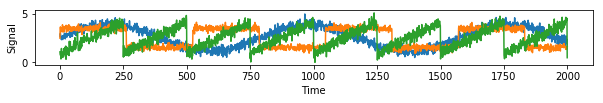

In [30]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(10,1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

Let's say i can observe the singal only comping from 3 sources (3 different measurements)

In [31]:
from sklearn.decomposition import NMF
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S, A.T)
nmf = NMF(n_components=3)
S_ = nmf.fit_transform(X)
pca = PCA(n_components=3)
H = pca.fit_transform(X)

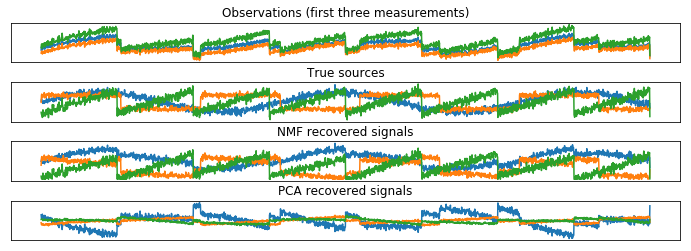

In [32]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
'True sources',
'NMF recovered signals',
'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(12, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

NMF did a reasonable job of discovering the true sources, while PCA failed to do so.

### t-SNE (Manifold learning)
- used for visualization, don't generate new features
- idea: find 2d representation of the data that preserve the distances betw. points (preserved information indicating whihc points are neighbours to each other)

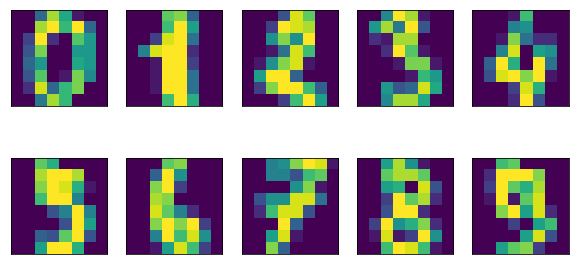

In [33]:
from sklearn.datasets import load_digits
digits_dataset = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits_dataset.images):
    ax.imshow(img)

Text(0.5, 0, 't-SNE feature 1')

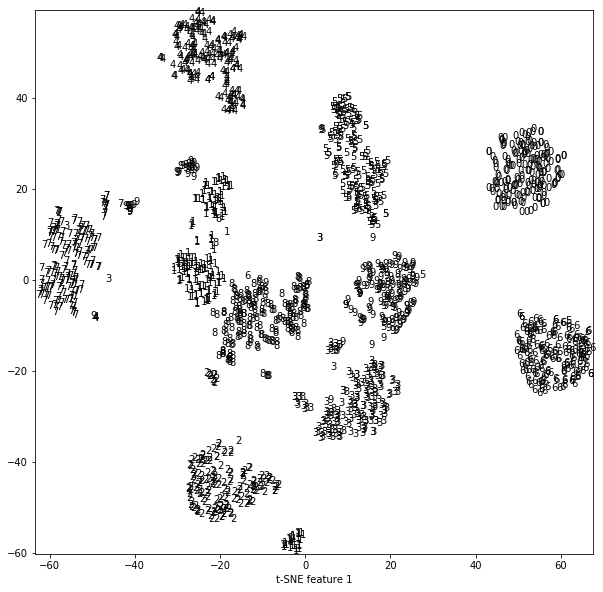

In [34]:
from sklearn.manifold import TSNE
tsne = TSNE()
digits_tsne = tsne.fit_transform(digits_dataset.data)

plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits_dataset.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits_dataset.target[i]))
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")

## Clustering
### k-means

#### Advantages
- easy to interpret
- fast, scales easily

#### Disadvantages
- relies on random initialization
- restrictive assumtions on the shape of the clusters

- assign each data point to the closest center
- set each cluster center as meand of the datapoints assigned to it

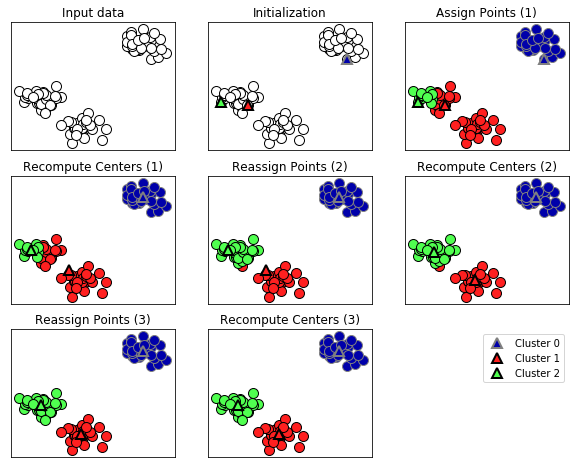

In [35]:
mglearn.plots.plot_kmeans_algorithm()

In [36]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X,y = make_blobs()
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

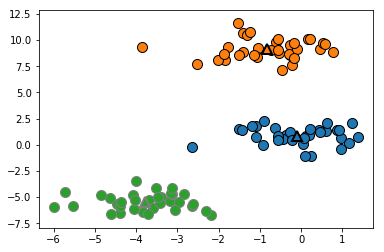

In [37]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],
markers='^', markeredgewidth=2)

K-,eans assumes all directions are equally important for each cluster - if the groups are e.g. stretched toward the diagonal, k-means won't perform well

Text(0, 0.5, 'Feature 1')

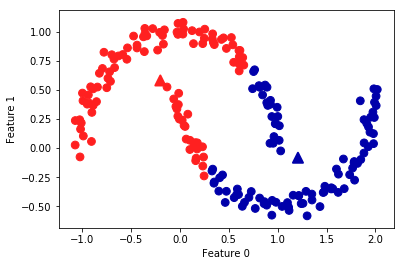

In [38]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

k-means can be also viewed (in scope of dim. reduction methods mentioned earlierr) as a decomposition method where each group of points is represented using a single component = **vector quantization**.

### Agglomerative clustering
- each point is its own cluster, continue merging similar (acc. to linkage criteria) clusters until the specified number of clusters is created

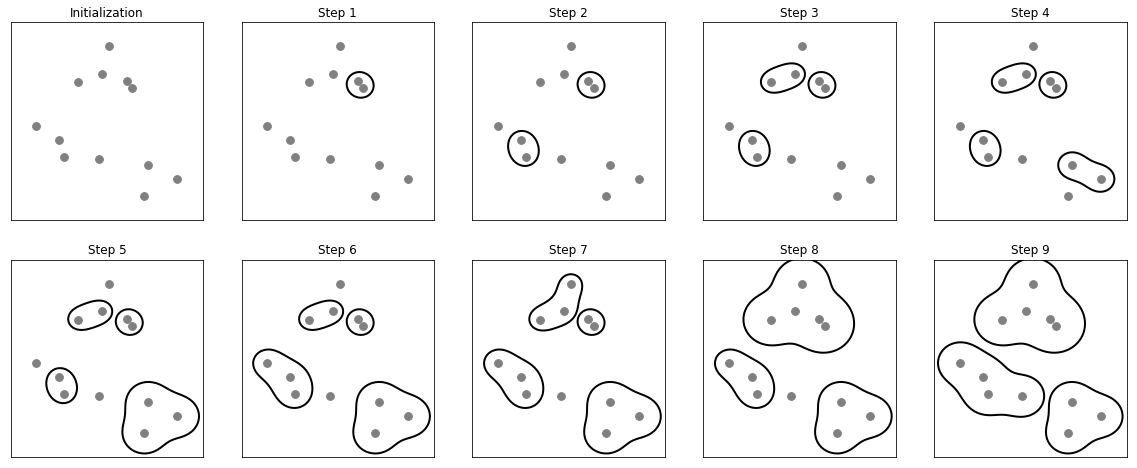

In [39]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

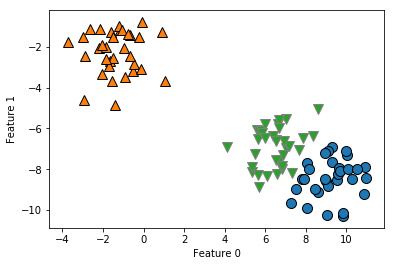

In [40]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs()
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:,0], X[:,1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

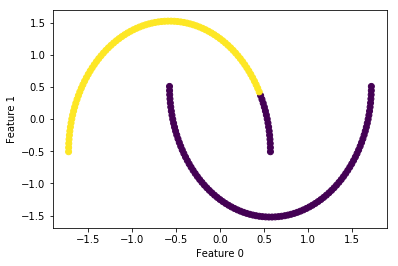

In [44]:
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

agg = AgglomerativeClustering(n_clusters=2)
clusters = agg.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

To examine the process of joining the clusters, let's plot scipy's dendogram

Text(0, 0.5, 'Cluster distance')

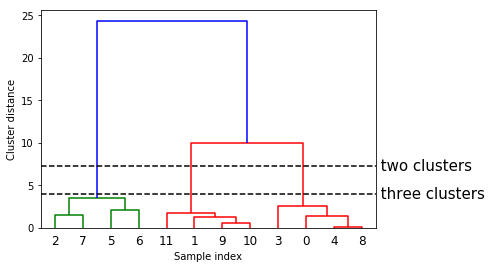

In [45]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(n_samples=12)
# aray of hierarchichal cluster similarities
linkage_array = ward(X)
dendrogram(linkage_array)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

### DBSCAN

#### Advantages
- doesn't require set n. of clusters a-priori
- can capture complex cluster
- can identify outliers

#### Disadvantages
- somewhat slower

#### Parameters
- `eps` - what is means for points to be close. very small = no points are 'core', very large = all points forming a single cluster

Identifies dense regions in feature space, points within dese regions are called `core` samples. 
1. pick arbitrary datapoint
2. find all points within distance `eps`
    - if there are less than `min_samples` points within distance `eps` of the starting point, the point is labeled as noise
    - else labeled as `core` and assigned to a new cluster label
3. Repeat until there are no more core samples

In [46]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
clusters
# Everything predicted as -1 = noise, because the default parameters are not 
# suitable for a toy dataset

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

Let's try it on a `moons` dataset that has proven to be problematic before

Text(0, 0.5, 'Feature 1')

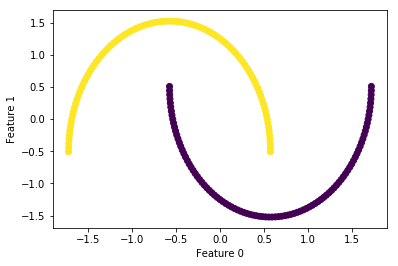

In [47]:
X, y = make_moons(n_samples=200)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Metrics
- ARI (adjusted rand index)
- NMI (normalized mutual information)

In [48]:
from sklearn.metrics import adjusted_rand_score
kmeans = KMeans(n_clusters = 2)
agglo = AgglomerativeClustering(n_clusters=2)
dbscan = DBSCAN()


print("ARI [kmeans]: {:.2f}".format(adjusted_rand_score(y, kmeans.fit_predict(X_scaled))))
print("ARI [agglo]: {:.2f}".format(adjusted_rand_score(y, agglo.fit_predict(X_scaled))))
print("ARI [dbscan]: {:.2f}".format(adjusted_rand_score(y, dbscan.fit_predict(X_scaled))))

ARI [kmeans]: 0.47
ARI [agglo]: 0.72
ARI [dbscan]: 1.00


## lfw dataset with clustering algorithms

In [49]:
X_people = people_dataset.data
y_people = people_dataset.target
pca = PCA(n_components=100, whiten=True)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

dbscan = DBSCAN(min_samples=3, eps=7)
labels_dbscan = dbscan.fit_predict(X_pca)
print(labels_dbscan.shape)

(3023,)


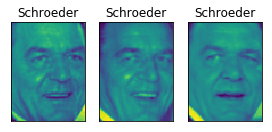

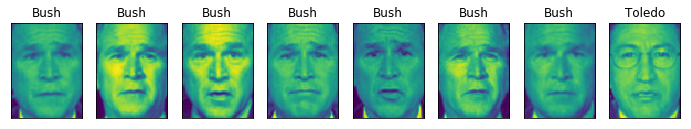

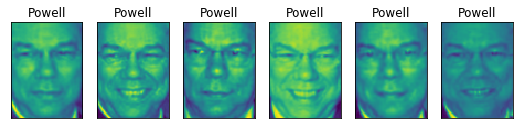

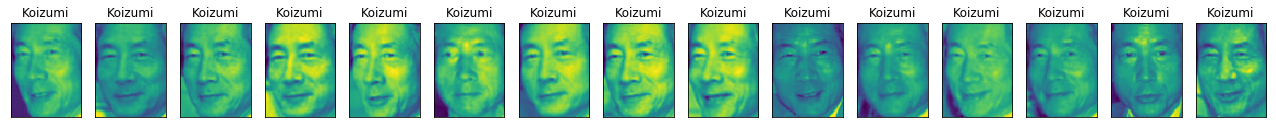

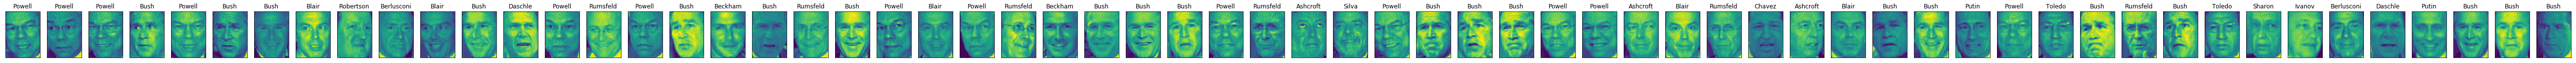

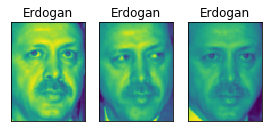

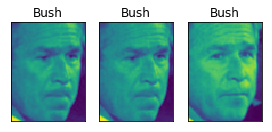

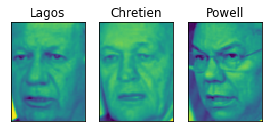

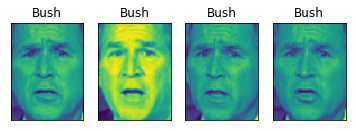

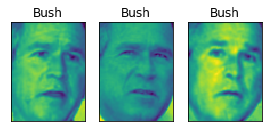

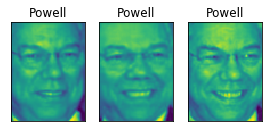

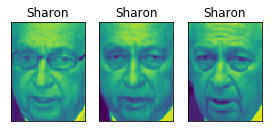

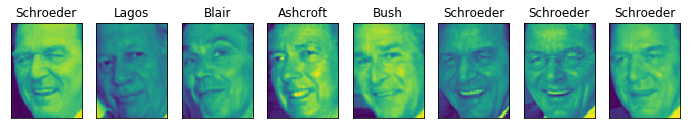

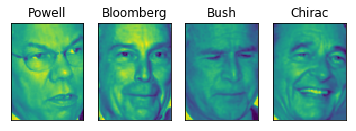

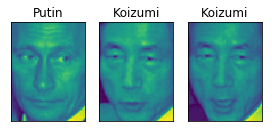

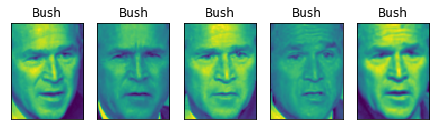

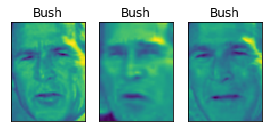

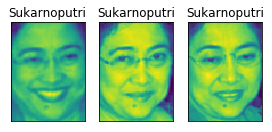

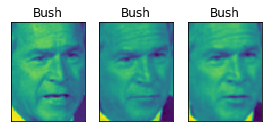

In [51]:
for cluster in range(max(labels_dbscan) + 1):
    mask = labels_dbscan == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4), subplot_kw={'xticks': (), 'yticks': ()})
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(people_dataset.images[0].shape))
        ax.set_title(people_dataset.target_names[label].split()[-1])

[339 462 400 236 421  76 359 271 274 185]
(3023,)


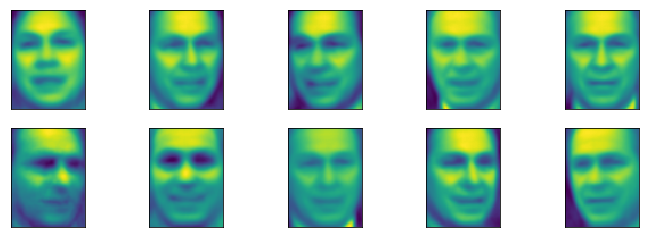

In [52]:
kmeans = KMeans(n_clusters=10)
labels_km = kmeans.fit_predict(X_pca)
print(np.bincount(labels_km))
print(labels_km.shape)

fig, axes = plt.subplots(2,5, subplot_kw={'xticks': (), 'yticks':()}, figsize=(12, 4))
for center, ax in zip(kmeans.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(people_dataset.images[0].shape))

cluster sizes agglomerative clustering: [ 77 306  89  95  90  28  66  92 158  22 177  55  21  31 102  65  13 163
 132  20  49  52  77 112 141  55  27  33   9  43 156  48  34  21  14  71
  65  94  91  29]


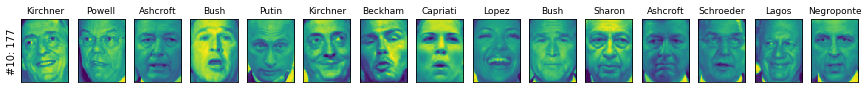

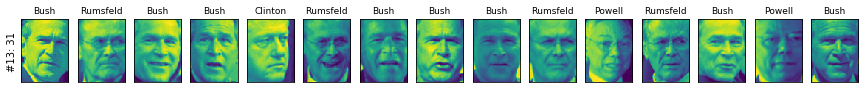

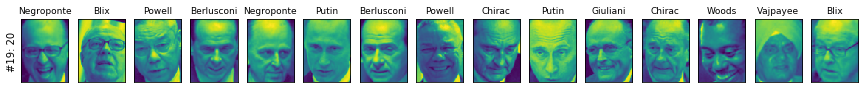

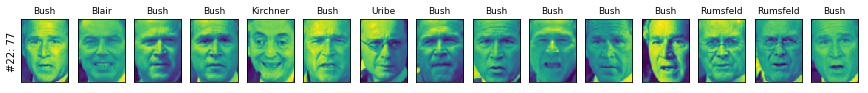

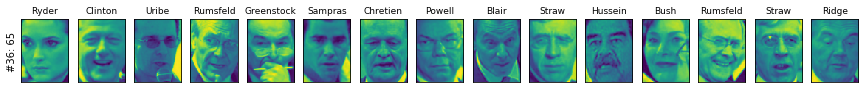

In [53]:
agglomerative = AgglomerativeClustering(n_clusters=40)
labels_agg = agglomerative.fit_predict(X_pca)
print("cluster sizes agglomerative clustering: {}".format(np.bincount(labels_agg)))
n_clusters = 40
for cluster in [10, 13, 19, 22, 36]: # hand-picked "interesting" clusters
    mask = labels_agg == cluster
    fig, axes = plt.subplots(1, 15, subplot_kw={'xticks': (), 'yticks': ()},
    figsize=(15, 8))
    cluster_size = np.sum(mask)
    axes[0].set_ylabel("#{}: {}".format(cluster, cluster_size))
    for image, label, asdf, ax in zip(X_people[mask], y_people[mask],
        labels_agg[mask], axes):
        ax.imshow(image.reshape(people_dataset.images[0].shape))
        ax.set_title(people_dataset.target_names[label].split()[-1],
        fontdict={'fontsize': 9})
    for i in range(cluster_size, 15):
        axes[i].set_visible(False)